# Graph Measures

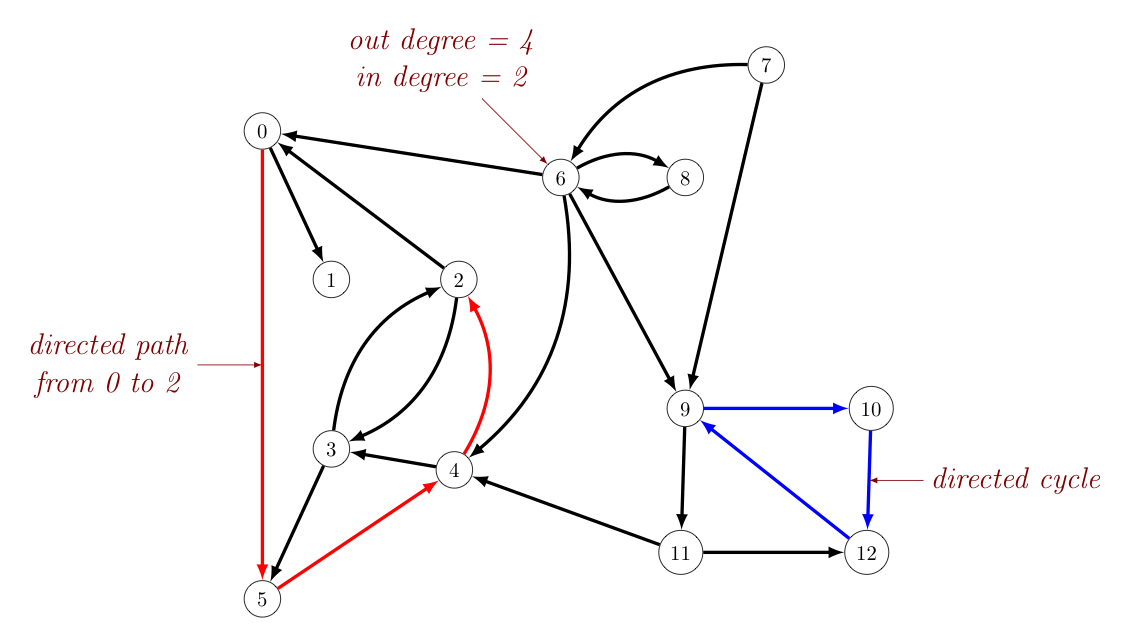

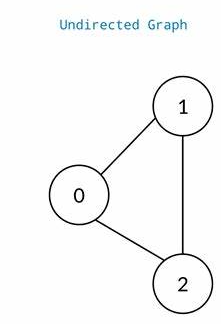

In [ ]:
# graph = {
#     0:[1,5],
#     1:[],
#     2:[0,3],
#     3:[2,5],
#     4:[2,3],
#     5:[4],
#     6:[0,4,8,9],
#     7:[6,9],
#     8:[6],
#     9:[10,11],
#     10:[12],
#     11:[12],
#     12:[9]
# }

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graphNX = nx.DiGraph()


graph = [
    [1,5],       # 0
    [],          # 1
    [0,3],       # 2
    [2,5],       # 3
    [2,3],       # 4
    [4],         # 5
    [0,4,8,9],   # 6
    [6,9],       # 7
    [6],         # 8
    [10,11],     # 9
    [12],        # 10
    [12,4],      # 11
    [9]          # 12
]
undirected_graph = [
    [1,2],       # 0
    [0,2],       # 1
    [1,0],       # 2
]

n=len(graph)
m = len(undirected_graph)

graphNX.add_nodes_from(['0','1','2','3','4','5','6','7','8','9','10','11','12'])
graphNX.add_edges_from([('0','1'),('0','5'),('2','0'),('2','3'),('3','2'),('3','5'),
 ('4','2'),('4','3'),('5','4'),('6','0'),('6','4'),('6','8'),('6','9'),
  ('7','6'),('7','9'),('8','6'),('9','10'),('9','11'),('10','12'),
   ('11','12'),('11','4'),('12','9')])




## In degree

In [ ]:
def in_degree(graph, n):
	in_degree = [0] *n
	for adj_vertices in graph:
		for vertex in adj_vertices:
			in_degree[vertex] += 1
	return in_degree


print("\nIn-degree:")
print(in_degree(graph, n))
print("\nIn-degree for undirected:")
print(in_degree(undirected_graph, m))


In-degree:
[2, 1, 2, 2, 3, 2, 2, 0, 1, 3, 1, 1, 2]

In-degree for undirected:
[2, 2, 2]


## Out-degree

In [ ]:
def out_degree(graph, n):
  out_degree = [0] *n
  for vertex in range(n):
    out_degree[vertex] = len(graph[vertex])
  return out_degree

print("\nOut-degree:")
print(out_degree(graph, n))
print("\nOut-degree for undirected:")
print(out_degree(undirected_graph, m))


Out-degree:
[2, 0, 2, 2, 2, 1, 4, 2, 1, 2, 1, 2, 1]

Out-degree for undirected:
[2, 2, 2]



## Density

In [ ]:
# Density of graph
def density(adj_list, n):
  total_edges = 0
  for vertex in range(n):
    for neighbor in adj_list[vertex]:
      if neighbor > vertex:
        total_edges += 1
  density = 2 * total_edges / (n * (n - 1))
  return density

print("Density: ",density(graph, n))
print("Density of undirected graph: ",density(undirected_graph, m))

# Density

density = nx.density(graphNX)
print("Density using NX:", density)

Density:  0.14102564102564102
Density of undirected graph:  1.0
Density using NX: 0.14102564102564102


## Density of Node

In [ ]:
# Density of a Node
def density_of_node(adj_list, node,n):
  total_edges = 0
  degree_in = in_degree(adj_list,n)[node]
  degree_out = out_degree(adj_list,n)[node]
  density_in_degree = degree_in / (n-1)
  print(f"In-degree density of node {node} is {density_in_degree}")
  density_out_degree = degree_out / (n-1)
  print(f"Out-degree density of node {node} is {density_out_degree}")
  density = (density_in_degree + density_out_degree) / 2
  return density

print("Avg of Density of Node: ",density_of_node(graph, 6, n))
print("Density of undirected graph: ",density_of_node(undirected_graph,1, m))

In-degree density of node 6 is 0.16666666666666666
Out-degree density of node 6 is 0.3333333333333333
Avg of Density of Node:  0.25
In-degree density of node 1 is 1.0
Out-degree density of node 1 is 1.0
Density of undirected graph:  1.0


## Reciprocity

In [ ]:
# Reciprocity of graph
def reciprocity(graph, n):
    recip_edges = 0
    total_edges = 0
    for v in range(n):
        neighbors = graph[v]
        for neighbor in neighbors:
            if v in graph[neighbor]:
                recip_edges += 1
        total_edges += len(neighbors)
    if total_edges == 0:
        return 0
    return recip_edges / total_edges

print("Reciprocity: ",reciprocity(graph, n))
print("Reciprocity of undirected graph: ",reciprocity(undirected_graph, m))

# Reciprocity
reciprocity = nx.reciprocity(graphNX)
print("Reciprocity using NX:",reciprocity)


Reciprocity:  0.18181818181818182
Reciprocity of undirected graph:  1.0
Reciprocity using NX: 0.18181818181818182


## Local Clustering Coefficient

In [ ]:
graph2 = [
    [2,3],         # 1
    [1,3,5],       # 2
    [1,2,4,5],     # 3
    [3,5],         # 4
    [2,4],         # 5
]

def local_clustering_coef(graph,node):
  n = len(graph)
  egocentric_graph = []
  egocentric_edges = 0
  for neighbor in graph[node]:
    egocentric_graph.append(neighbor)
  for node in egocentric_graph:
    for neighbor in graph[node]:
      if neighbor in egocentric_graph:
        egocentric_edges += 1

  return 2*egocentric_edges / n*(n-1)

print(local_clustering_coef(graph2,0))

# def local_cc(graph, node):
#   n = len(graph)
#   max_edges = n(n-1)/2
#   for current_node in graph:
#     if current_node is not node:


3.2
